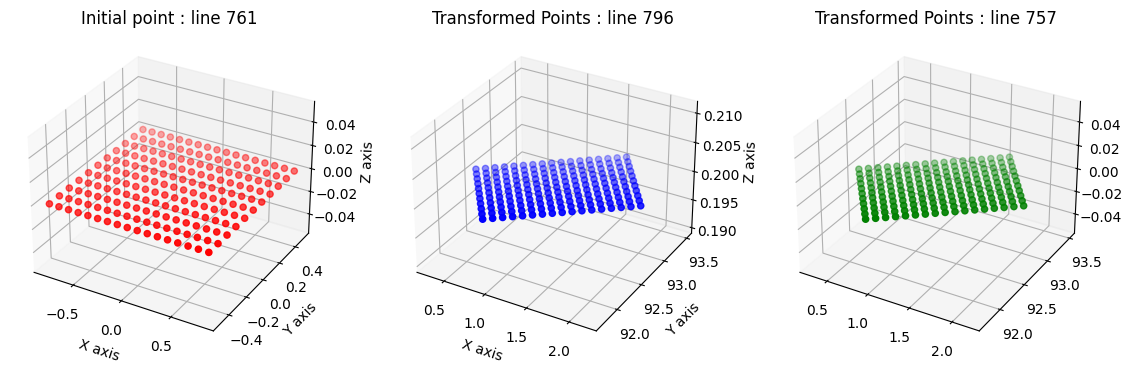

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch

# Your provided code, with minor modifications for clarity
def normalize(x, eps: float = 1e-9):
    return x / x.norm(p=2, dim=-1).clamp(min=eps, max=None).unsqueeze(-1)

def quat_apply(a, b):
    shape = b.shape
    a = a.reshape(-1, 4)
    b = b.reshape(-1, 3)
    xyz = a[:, :3]
    t = xyz.cross(b, dim=-1) * 2
    return (b + a[:, 3:] * t + xyz.cross(t, dim=-1)).view(shape)

def quat_apply_yaw(quat, vec):
    quat_yaw = quat.clone().view(-1, 4)
    quat_yaw[:, :2] = 0.
    quat_yaw = normalize(quat_yaw)
    return quat_apply(quat_yaw, vec)

root_states = torch.tensor([[57.6234, 72.4982, 0.2005]])

measured_points_x = [-0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
measured_points_y = [-0.5, -0.4, -0.3, -0.2, -0.1, 0., 0.1, 0.2, 0.3, 0.4, 0.5]
x = torch.tensor(measured_points_x)
y = torch.tensor(measured_points_y)
grid_x, grid_y = torch.meshgrid(x, y, indexing='ij')
points = torch.zeros(1, grid_x.numel(), 3)
points[:, :, 0] = grid_x.flatten()
points[:, :, 1] = grid_y.flatten()

quat = torch.tensor([[0.0165, 0.0842, 0.3220, 0.9428]])
qua_points = quat_apply_yaw(quat.repeat(1, grid_x.numel()), points + root_states.unsqueeze(1))

qua_points_scal = qua_points / 0.1
px = qua_points_scal[:, :, 0].view(-1).floor().to(torch.int64)  # Convert to long integer type after floor
py = qua_points_scal[:, :, 1].view(-1).floor().to(torch.int64)

height_samples = torch.zeros(1500, 1500, dtype=torch.int16, device='cuda:0')
px = torch.clip(px, 0, height_samples.shape[0] - 2)
py = torch.clip(py, 0, height_samples.shape[1] - 2)
#height_samples = torch.zeros(1500, 1500, dtype=torch.int16, device='cuda:0')
heights1 = height_samples[px, py]
heights2 = height_samples[px+1, py]
heights3 = height_samples[px, py+1]

heights = torch.min(heights1, heights2)
heights = torch.min(heights, heights3)

point_heights = heights.view(1, -1) * 187
#print(heights.view(1, -1)* 187)
#print(point_heights.view(-1))
#print(qua_points[0, :, 2])
#print(qua_points_scal)

# Prepare for plotting
fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

# Plotting the original points
ax1.scatter(points[0, :, 0], points[0, :, 1], points[0, :, 2], c='r', marker='o')
ax1.set_title('Initial point : line 761')
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')

# Plotting the transformed points
ax2.scatter(qua_points[0, :, 0], qua_points[0, :, 1], qua_points[0, :, 2], c='b', marker='o')
ax2.set_title('Transformed Points : line 796')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')

# Before plotting, ensure all tensors are moved to the CPU
ax3.scatter(qua_points[0, :, 0].cpu(), qua_points[0, :, 1].cpu(), point_heights.view(-1).cpu(), c='g', marker='o')

ax3.set_title('Transformed Points : line 757')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')
plt.show()

In [8]:
print(qua_points_scal)

tensor([[[  9.0916, 917.1594,   2.0050],
         [  8.4799, 917.9504,   2.0050],
         [  7.8682, 918.7415,   2.0050],
         [  7.2564, 919.5326,   2.0050],
         [  6.6447, 920.3237,   2.0050],
         [  6.0330, 921.1147,   2.0050],
         [  5.4213, 921.9058,   2.0050],
         [  4.8096, 922.6968,   2.0050],
         [  4.1978, 923.4880,   2.0050],
         [  3.5861, 924.2790,   2.0050],
         [  2.9744, 925.0701,   2.0050],
         [  9.8826, 917.7711,   2.0050],
         [  9.2709, 918.5621,   2.0050],
         [  8.6592, 919.3531,   2.0050],
         [  8.0475, 920.1443,   2.0050],
         [  7.4358, 920.9354,   2.0050],
         [  6.8241, 921.7264,   2.0050],
         [  6.2124, 922.5175,   2.0050],
         [  5.6006, 923.3085,   2.0050],
         [  4.9889, 924.0997,   2.0050],
         [  4.3772, 924.8907,   2.0050],
         [  3.7655, 925.6818,   2.0050],
         [ 10.6737, 918.3828,   2.0050],
         [ 10.0620, 919.1739,   2.0050],
         [  9.45

In [9]:
print(qua_points)

tensor([[[ 0.9092, 91.7159,  0.2005],
         [ 0.8480, 91.7950,  0.2005],
         [ 0.7868, 91.8741,  0.2005],
         [ 0.7256, 91.9533,  0.2005],
         [ 0.6645, 92.0324,  0.2005],
         [ 0.6033, 92.1115,  0.2005],
         [ 0.5421, 92.1906,  0.2005],
         [ 0.4810, 92.2697,  0.2005],
         [ 0.4198, 92.3488,  0.2005],
         [ 0.3586, 92.4279,  0.2005],
         [ 0.2974, 92.5070,  0.2005],
         [ 0.9883, 91.7771,  0.2005],
         [ 0.9271, 91.8562,  0.2005],
         [ 0.8659, 91.9353,  0.2005],
         [ 0.8047, 92.0144,  0.2005],
         [ 0.7436, 92.0935,  0.2005],
         [ 0.6824, 92.1726,  0.2005],
         [ 0.6212, 92.2518,  0.2005],
         [ 0.5601, 92.3309,  0.2005],
         [ 0.4989, 92.4100,  0.2005],
         [ 0.4377, 92.4891,  0.2005],
         [ 0.3765, 92.5682,  0.2005],
         [ 1.0674, 91.8383,  0.2005],
         [ 1.0062, 91.9174,  0.2005],
         [ 0.9450, 91.9965,  0.2005],
         [ 0.8839, 92.0756,  0.2005],
         [ 0

In [55]:
print((0.9 - 0.25) % 1)
print(0.05 - 0.25)

#(self.commands[env_ids_in_category, 5] / 2 - 0.25) % 1

0.65
-0.2


In [66]:
import numpy as np
cfg_value = [
    np.array([-4.76190476, -4.28571429, -3.80952381, -3.33333333, -2.85714286, -2.38095238,
              -1.9047619, -1.42857143, -0.95238095, -0.47619048, 0, 0.47619048,
              0.95238095, 1.42857143, 1.9047619, 2.38095238, 2.85714286, 3.33333333,
              3.80952381, 4.28571429, 4.76190476]),
    np.array([0]),
    np.array([-4.76190476, -4.28571429, -3.80952381, -3.33333333, -2.85714286, -2.38095238,
              -1.9047619, -1.42857143, -0.95238095, -0.47619048, 0, 0.47619048,
              0.95238095, 1.42857143, 1.9047619, 2.38095238, 2.85714286, 3.33333333,
              3.80952381, 4.28571429, 4.76190476]),
    np.array([-0.05]), np.array([3.]), np.array([0.5]),
    np.array([0.5]), np.array([0.5]), np.array([0.5]),
    np.array([0.19]), np.array([0.]), np.array([0.]),
    np.array([0.275]), np.array([0.4]), np.array([0.005])
]


np.len(cfg_value)

TypeError: array() takes from 1 to 2 positional arguments but 15 were given

In [76]:
import numpy as np
v_range = [-5, 5, 21]
bin_size = (v_range[1] - v_range[0]) / v_range[2]
cfg = np.linspace(0, v_range[2] -1, v_range[2])

cfg_value = np.array([[-4.76190476, -4.28571429, -3.80952381, -3.33333333, -2.85714286, -2.38095238,
                      -1.9047619,  -1.42857143, -0.95238095, -0.47619048,  0.     ,     0.47619048,
                      0.95238095,  1.42857143,  1.9047619,   2.38095238,  2.85714286,  3.33333333,
                      3.80952381,  4.28571429,  4.76190476],
                      [0],
                    
                      [-4.76190476, -4.28571429, -3.80952381, -3.33333333, -2.85714286, -2.38095238,
                      -1.9047619,  -1.42857143, -0.95238095, -0.47619048,  0.     ,     0.47619048,
                      0.95238095,  1.42857143,  1.9047619,   2.38095238,  2.85714286,  3.33333333,
                      3.80952381,  4.28571429,  4.76190476],
                      [-0.05], [3.], [0.5], 
                      [0.5], [0.5],[0.5], 
                      [0.19], [0.], [0.], 
                      [0.275], [0.4], [0.005]])
raw_grid = np.stack(np.meshgrid(cfg_value, indexing='ij'))
'''
keys ['x_vel', 'y_vel', 'yaw_vel', 'body_height', 'gait_frequency', 'gait_phase', 
'gait_offset', 'gait_bounds', 'gait_duration', 'footswing_height', 'body_pitch', 'body_roll', 
'stance_width', 'stance_length', 'aux_reward_coef']
len keys 15
'''




grid = raw_grid.reshape([15, -1])
l = grid[0]
weights = np.zeros(l)

def set_to(low, high, value = 1.0):
    inds = np.logical_and(
        grid >=low[:, None],
        grid <= high[:, None]
    ).all(axis=0)
    weights[inds] = value
    



TypeError: array() takes from 1 to 2 positional arguments but 15 were given

In [ ]:
a = (x_vel = 4, y_vel = 5)
